In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt


from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [155]:
df = pd.read_csv("pIC50.csv")
df

,Unnamed: 0,cid,smiles,bioactivity,type,value (nM),pIC50
0,0,118159240,CC(=O)N1CCc2nc(N3CCC(C(=O)c4cc(Cl)ccc4F)CC3)c(...,Active,IC50,0.0138,10.860121
1,1,118180377,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CN(C(=...,Active,IC50,0.0138,10.860121
2,2,118180376,CC(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)[C@H](F)C3)...,Active,IC50,0.0378,10.422508
3,3,118180374,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(CN...,Active,IC50,0.0626,10.203426
4,4,127024467,Cc1nccc2nc(NC3CC3)c(N3CCC(Cc4ccc(F)cc4F)CC3)nc...,Active,IC50,2.0000,8.698970
...,...,...,...,...,...,...,...
401,401,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0000,3.468266
402,402,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0000,3.466609
403,403,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0000,3.440213
404,404,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0000,3.407823


In [156]:
#from sklearn.datasets import load_iris

In [157]:
#iris = load_iris()
#
#iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
#iris_df.head()
#iris_df.shape
#

In [158]:
#iris_X = np.array(iris_df)
#iris_X

In [159]:
    #iris_df['target'] = iris.target
    #iris_y = np.array(iris_df['target'])
    #iris_y.shape

<Figure size 2000x2000 with 0 Axes>

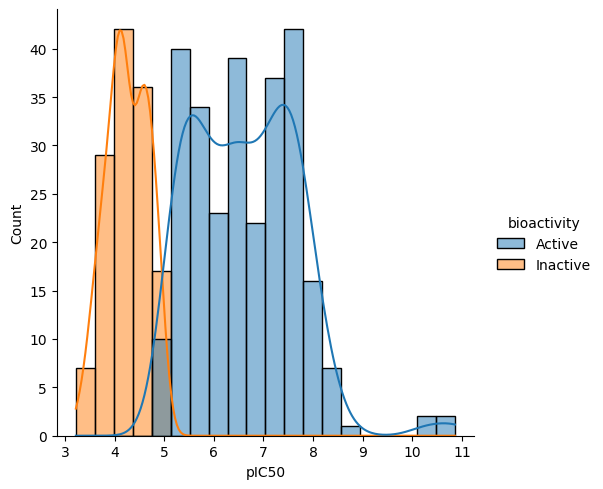

In [160]:
plt.figure(figsize=(20, 20))

sns.displot(df, bins=20, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [161]:
df2 = df[["cid", "smiles", "pIC50"]]
df2

,cid,smiles,pIC50
0,118159240,CC(=O)N1CCc2nc(N3CCC(C(=O)c4cc(Cl)ccc4F)CC3)c(...,10.860121
1,118180377,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CN(C(=...,10.860121
2,118180376,CC(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)[C@H](F)C3)...,10.422508
3,118180374,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(CN...,10.203426
4,127024467,Cc1nccc2nc(NC3CC3)c(N3CCC(Cc4ccc(F)cc4F)CC3)nc...,8.698970
...,...,...,...
401,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,3.468266
402,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,3.466609
403,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,3.440213
404,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,3.407823


In [162]:
df2["activity_label"] = np.zeros(len(df2))

df2.loc[df2[df2.pIC50 >= 5].index, "activity_label"] = 1.0

print("Number of active molecules:", int(df2.activity_label.sum()))
print("Number of inactive molecules:", len(df2) - int(df2.activity_label.sum()))

df

Number of active molecules: 275
Number of inactive molecules: 131


C:\Users\supak\AppData\Local\Temp\ipykernel_6700\901482849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["activity_label"] = np.zeros(len(df2))


,Unnamed: 0,cid,smiles,bioactivity,type,value (nM),pIC50
0,0,118159240,CC(=O)N1CCc2nc(N3CCC(C(=O)c4cc(Cl)ccc4F)CC3)c(...,Active,IC50,0.0138,10.860121
1,1,118180377,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CN(C(=...,Active,IC50,0.0138,10.860121
2,2,118180376,CC(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)[C@H](F)C3)...,Active,IC50,0.0378,10.422508
3,3,118180374,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(CN...,Active,IC50,0.0626,10.203426
4,4,127024467,Cc1nccc2nc(NC3CC3)c(N3CCC(Cc4ccc(F)cc4F)CC3)nc...,Active,IC50,2.0000,8.698970
...,...,...,...,...,...,...,...
401,401,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0000,3.468266
402,402,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0000,3.466609
403,403,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0000,3.440213
404,404,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0000,3.407823


Create Fingerprint

In [163]:
def fingerprints(smiles, method="maccs", n_bits=2048):

    # convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    if method == "morgan4":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=4, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    else:
        # NBVAL_CHECK_OUTPUT
        print(f"Warning: Wrong method specified: {method}. Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [164]:
compound_df = df2.copy()

compound_df["fp"] = compound_df["smiles"].apply(fingerprints)
compound_df

,cid,smiles,pIC50,activity_label,fp
0,118159240,CC(=O)N1CCc2nc(N3CCC(C(=O)c4cc(Cl)ccc4F)CC3)c(...,10.860121,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,118180377,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CN(C(=...,10.860121,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,118180376,CC(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)[C@H](F)C3)...,10.422508,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,118180374,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(CN...,10.203426,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,127024467,Cc1nccc2nc(NC3CC3)c(N3CCC(Cc4ccc(F)cc4F)CC3)nc...,8.698970,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
401,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,3.468266,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
402,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,3.466609,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
403,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,3.440213,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
404,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,3.407823,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


ML Functions

In [165]:
#Plot Data
def plot_curve_functions(models, test_x, test_y):
    
    fig, ax = plt.subplots()
    
    
    #Loop iterates model list
    for model in models:
        
        #Select model
        ml_model = model["model"]
        
        #Predict test probability
        test_prob = ml_model.predict_proba(test_x)[:, 1]
        
        #Predict class on test set
        test_pred = ml_model.predict(test_x)
        
        #Compute False/True postitive rate
        fpr, tpr, thresholds = metrics.roc_curve(test_y, test_prob)
        
        #Calculate AUC
        auc = roc_auc_score(test_y, test_prob)
        
        ax.plot(fpr, tpr, label=(f"{model['label']} AUC area = {auc:.5f}"))
    
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc="lower right")

    #if save_png:
        #fig.savefig(dpi=300, bbox_inches="tight", transparent=True)
    #return fig

In [166]:
def model_performance(ml_model, test_x, test_y, verbose=True):
    
    #Predict probability on test set
    test_prob = ml_model.predict_proba(test_x)[: ,1]
    
    #Predict class on test set
    test_pred = ml_model.predict(test_x)
    
    #Performance of test set
    accuracy = accuracy_score(test_y, test_pred)
    sens = recall_score(test_y, test_pred)#, average='macro') # In case of Multi class, change a binary to micro, macro, weighted or None. pos_label is ignored
    spec = recall_score(test_y, test_pred, pos_label=0)#, average='macro)
    auc = roc_auc_score(test_y, test_prob)#,multi_class='ovr') # in case of Multi class, put function "multi_class = ovr or ovo"
    cm = confusion_matrix(test_y, test_pred)
    
    if verbose:
        print(f"Accuracy: {accuracy:.5f}")
        print(f"Sensitivity: {sens:.5f}")
        print(f"Specificity: {spec:.5f}")
        print(f"AUC: {auc:.5f}")
        print(f"Confusion Matrix: {cm}")

    return accuracy, sens, spec, auc, cm

In [167]:
def model_training_and_validation(ml_model, name, splits, verbose=True):

    train_x, test_x, train_y, test_y = splits

    #Fit model
    ml_model.fit(train_x, train_y)

    #Calculate performance results
    accuracy, sens, spec, auc, cm = model_performance(ml_model, test_x, test_y, verbose)
    
    sns.heatmap(cm, annot=True)
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    
    return accuracy, sens, spec, auc, cm

Split Data

In [232]:
fp_to_model = compound_df.fp.tolist()
label_to_model = compound_df.activity_label.tolist()


(static_train_x, 
 static_test_x, 
 static_train_y,
 static_test_y) = train_test_split(fp_to_model, label_to_model, 
                                   test_size=0.2)

splits = [static_train_x, static_test_x, static_train_y, static_test_y]

print("Training data size:", len(static_train_x))
print("Test data size:", len(static_test_x))


Training data size: 324
Test data size: 82


Random Forest

In [233]:
param = {
    "n_estimators": 40,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF = RandomForestClassifier(**param)

Accuracy: 0.96341
Sensitivity: 0.94915
Specificity: 1.00000
AUC: 0.98231
Confusion Matrix: [[23  0]
 [ 3 56]]


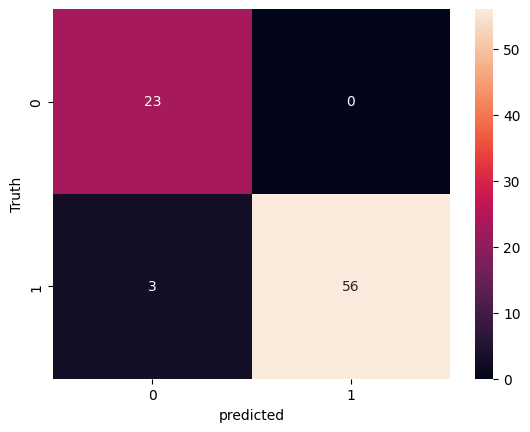

In [234]:
performance_measures = model_training_and_validation(model_RF, "RF", splits)

In [235]:
#feature_iris = pd.Series(model_RF.feature_importances_, index=compound_df.fp).sort_values(ascending=False)
#feature_iris

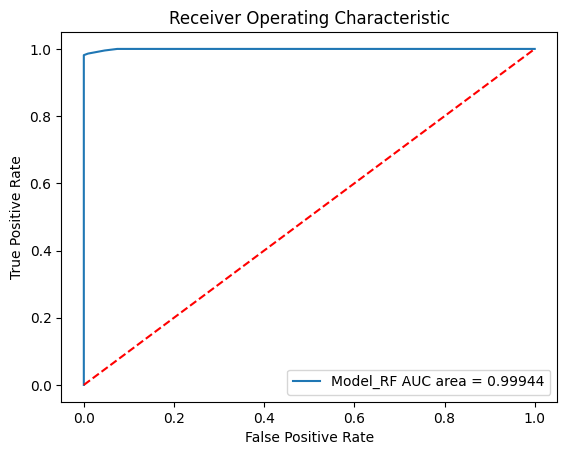

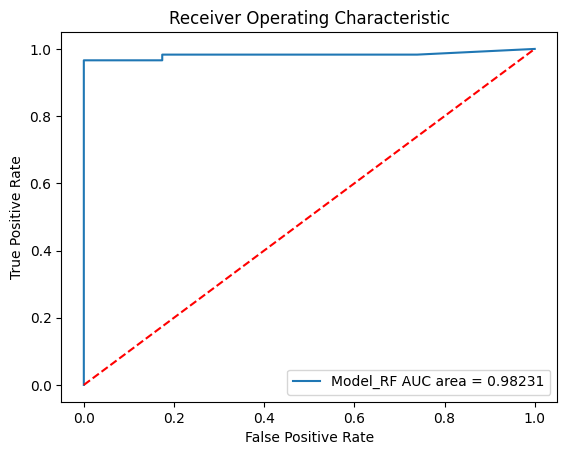

In [236]:
models = [{"label": "Model_RF", "model": model_RF}]

# Plot roc curve
plot_curve_functions(models, static_train_x, static_train_y)
plot_curve_functions(models, static_test_x, static_test_y)

SVM

Accuracy: 0.93902
Sensitivity: 0.91525
Specificity: 1.00000
AUC: 0.98268
Confusion Matrix: [[23  0]
 [ 5 54]]


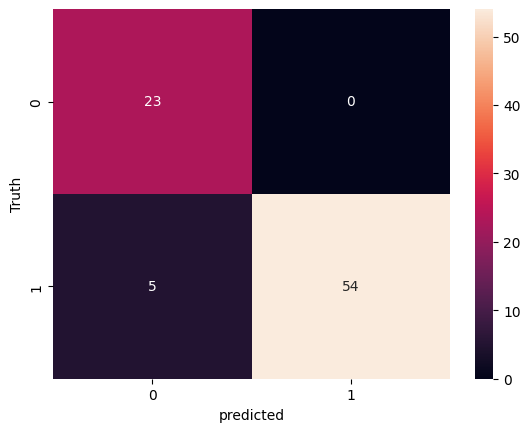

In [237]:
model_SVM = svm.SVC(kernel="linear", C=1, gamma=0.1, probability=True)

# Fit model on single split
performance_measures = model_training_and_validation(model_SVM, "SVM", splits)

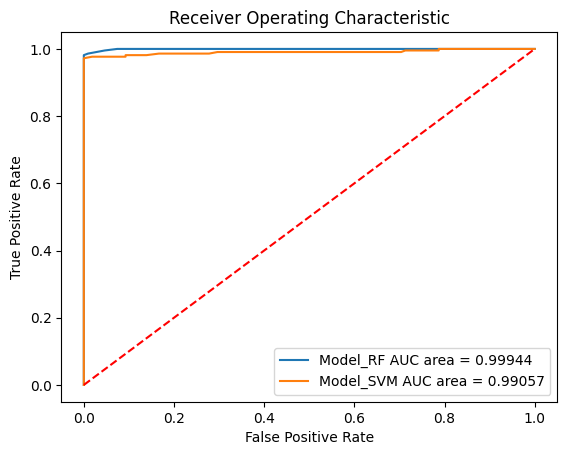

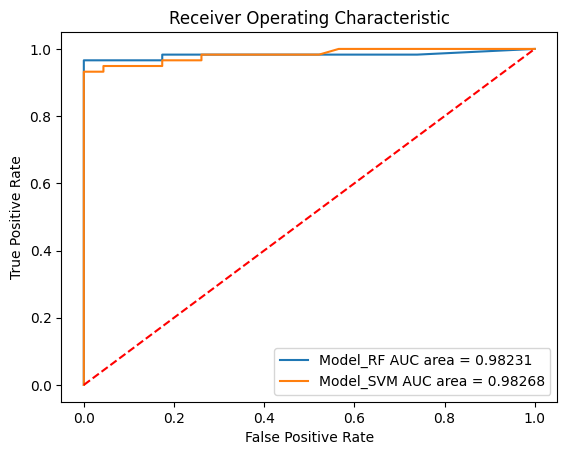

In [238]:
models.append({"label": "Model_SVM", "model": model_SVM})

# Plot roc curve
plot_curve_functions(models, static_train_x, static_train_y)
plot_curve_functions(models, static_test_x, static_test_y)

ANN

Accuracy: 0.91463
Sensitivity: 0.93220
Specificity: 0.86957
AUC: 0.97605
Confusion Matrix: [[20  3]
 [ 4 55]]


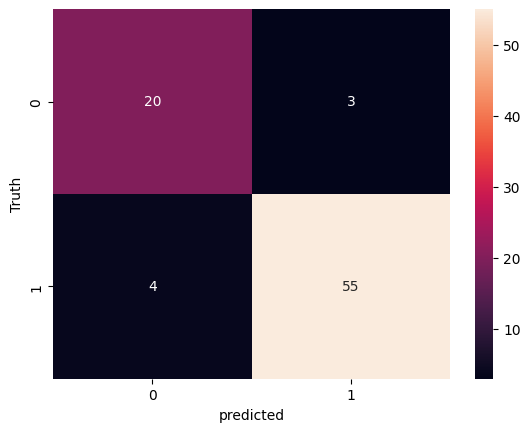

In [239]:
#Specify model
model_ANN = MLPClassifier(hidden_layer_sizes=(3, ), activation='identity',
                          solver='lbfgs', alpha=0.0001, max_iter=400)

# Fit model on single split
performance_measures = model_training_and_validation(model_ANN, "ANN", splits)

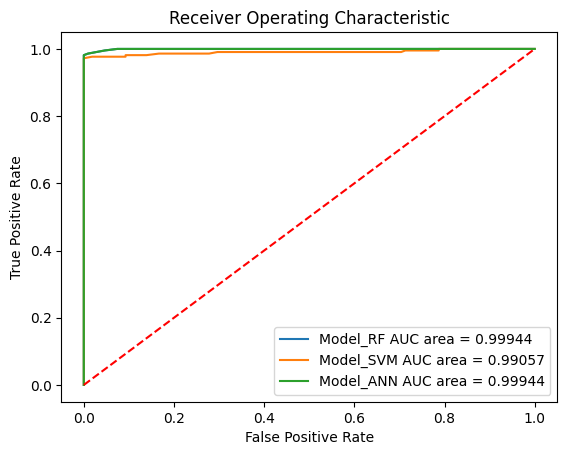

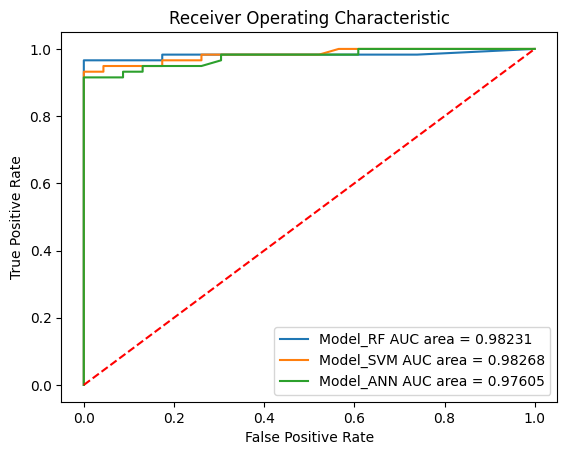

In [240]:
# Append ANN model
models.append({"label": "Model_ANN", "model": model_ANN})

# Plot roc curve
plot_curve_functions(models, static_train_x, static_train_y)
plot_curve_functions(models, static_test_x, static_test_y)

Classification Using Molecular Features

In [241]:
df2

,cid,smiles,pIC50,activity_label
0,118159240,CC(=O)N1CCc2nc(N3CCC(C(=O)c4cc(Cl)ccc4F)CC3)c(...,10.860121,1.0
1,118180377,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CN(C(=...,10.860121,1.0
2,118180376,CC(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)[C@H](F)C3)...,10.422508,1.0
3,118180374,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(CN...,10.203426,1.0
4,127024467,Cc1nccc2nc(NC3CC3)c(N3CCC(Cc4ccc(F)cc4F)CC3)nc...,8.698970,1.0
...,...,...,...,...
401,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,3.468266,0.0
402,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,3.466609,0.0
403,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,3.440213,0.0
404,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,3.407823,0.0


In [242]:
smile = [Chem.MolFromSmiles(i) for i in df2.smiles]
mol = [m for m in smile]
len(mol)

406

In [243]:
descriptors = [Descriptors.CalcMolDescriptors(i) for i in mol]
rdkit_gpr6 = pd.DataFrame(descriptors)
rdkit_gpr6

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.187820,14.187820,0.034977,-0.532030,0.658737,473.980,444.748,473.199381,176,0,...,0,0,0,0,0,0,0,0,0,0
1,14.018710,14.018710,0.040537,-0.692270,0.679405,488.583,454.311,488.271131,190,0,...,0,0,0,0,0,0,0,0,0,1
2,15.077880,15.077880,0.007235,-1.401722,0.732420,463.504,435.280,463.219510,178,0,...,0,0,0,0,0,0,0,0,0,0
3,14.027118,14.027118,0.103907,-0.662901,0.619150,502.610,466.322,502.286781,196,0,...,0,0,0,0,0,0,0,0,0,0
4,14.030648,14.030648,0.373029,-5.083333,0.440062,523.506,497.298,523.200666,198,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,13.980299,13.980299,0.084153,-0.679987,0.688873,471.552,440.304,471.244582,182,0,...,0,0,0,0,0,0,0,0,0,0
402,13.250627,13.250627,0.029579,-3.463023,0.663173,487.626,454.362,487.225326,184,0,...,0,0,1,0,0,0,0,0,0,0
403,14.306601,14.306601,0.055294,-0.333280,0.747351,451.550,421.310,451.249587,174,0,...,0,0,0,0,0,0,0,0,0,0
404,14.017818,14.017818,0.082053,-0.681796,0.663656,500.594,466.322,500.271131,194,0,...,0,0,0,0,0,0,0,0,0,1


In [244]:
rdkit_gpr6.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0,...,406.000000,406.000000,406.000000,406.0,406.0,406.0,406.0,406.000000,406.000000,406.000000
mean,13.407435,13.407435,0.146775,-2.906237,0.551806,490.560377,465.303273,490.068246,181.921182,0.0,...,0.007389,0.068966,0.019704,0.0,0.0,0.0,0.0,0.022167,0.022167,0.054187
std,1.594267,1.594267,0.162150,2.097198,0.142109,77.633891,74.900296,77.514098,30.455532,0.0,...,0.085748,0.253708,0.139154,0.0,0.0,0.0,0.0,0.147410,0.163303,0.226666
min,4.871601,4.871601,0.000000,-5.083333,0.243006,253.308000,246.252000,252.997968,82.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,13.003812,13.003812,0.040100,-5.083333,0.434120,457.531250,428.293000,457.233928,172.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,13.966414,13.966414,0.082684,-3.226666,0.554611,502.816000,472.048500,502.228169,190.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,14.176661,14.176661,0.202477,-0.682752,0.678792,538.844000,513.289750,538.190170,198.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,15.248740,15.248740,0.786402,0.716349,0.802254,656.641000,629.821000,656.248264,248.000000,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,1.000000


Standardization

In [245]:
from sklearn import preprocessing

In [246]:
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(rdkit_gpr6)
x

array([[ 0.49009812,  0.49009812, -0.69032455, ..., -0.15056568,
        -0.13591197, -0.23935678],
       [ 0.38389343,  0.38389343, -0.65599497, ..., -0.15056568,
        -0.13591197,  4.17786374],
       [ 1.04907462,  1.04907462, -0.86162177, ..., -0.15056568,
        -0.13591197, -0.23935678],
       ...,
       [ 0.56469504,  0.56469504, -0.56487122, ..., -0.15056568,
        -0.13591197, -0.23935678],
       [ 0.38333332,  0.38333332, -0.39963949, ..., -0.15056568,
        -0.13591197,  4.17786374],
       [ 0.39827121,  0.39827121, -0.85532486, ..., -0.15056568,
        -0.13591197, -0.23935678]])

In [247]:
rdkit_gpr6_standardized = pd.DataFrame(x, columns=rdkit_gpr6.columns)
rdkit_gpr6_standardized

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.490098,0.490098,-0.690325,1.133482,0.753383,-0.213835,-0.274774,-0.217892,-0.194660,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
1,0.383893,0.383893,-0.655995,1.056981,0.899003,-0.025502,-0.146940,-0.023213,0.265593,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,4.177864
2,1.049075,1.049075,-0.861622,0.718278,1.272524,-0.348942,-0.401338,-0.346800,-0.128910,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
3,0.389174,0.389174,-0.264701,1.071003,0.474473,0.155402,0.013618,0.157824,0.462845,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
4,0.391391,0.391391,1.397058,-1.039379,-0.787299,0.424895,0.427691,0.427965,0.528595,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.359770,0.359770,-0.386677,1.062845,0.965707,-0.245148,-0.334179,-0.243141,0.002591,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
402,-0.098479,-0.098479,-0.723655,-0.265818,0.784637,-0.037844,-0.146258,-0.036721,0.068342,0.0,...,-0.08628,-0.272166,7.053368,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
403,0.564695,0.564695,-0.564871,1.228369,1.377722,-0.503112,-0.588082,-0.501413,-0.260411,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
404,0.383333,0.383333,-0.399639,1.061982,0.788040,0.129402,0.013618,0.131789,0.397094,0.0,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,4.177864


In [248]:
df_desc = df2.copy()
df_rdkit_desc_standard = df_desc[['activity_label']].join(rdkit_gpr6_standardized)
df_rdkit_desc_standard

,activity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.0,0.490098,0.490098,-0.690325,1.133482,0.753383,-0.213835,-0.274774,-0.217892,-0.194660,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
1,1.0,0.383893,0.383893,-0.655995,1.056981,0.899003,-0.025502,-0.146940,-0.023213,0.265593,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,4.177864
2,1.0,1.049075,1.049075,-0.861622,0.718278,1.272524,-0.348942,-0.401338,-0.346800,-0.128910,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
3,1.0,0.389174,0.389174,-0.264701,1.071003,0.474473,0.155402,0.013618,0.157824,0.462845,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
4,1.0,0.391391,0.391391,1.397058,-1.039379,-0.787299,0.424895,0.427691,0.427965,0.528595,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.0,0.359770,0.359770,-0.386677,1.062845,0.965707,-0.245148,-0.334179,-0.243141,0.002591,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
402,0.0,-0.098479,-0.098479,-0.723655,-0.265818,0.784637,-0.037844,-0.146258,-0.036721,0.068342,...,-0.08628,-0.272166,7.053368,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
403,0.0,0.564695,0.564695,-0.564871,1.228369,1.377722,-0.503112,-0.588082,-0.501413,-0.260411,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,-0.239357
404,0.0,0.383333,0.383333,-0.399639,1.061982,0.788040,0.129402,0.013618,0.131789,0.397094,...,-0.08628,-0.272166,-0.141776,0.0,0.0,0.0,0.0,-0.150566,-0.135912,4.177864


UMAP plot (Fingerprint VS Features)

In [249]:
import umap.umap_ as umap
import umap.plot

In [250]:
rdkit_gpr6_standardized.shape

(406, 209)

In [251]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean', 
                    #random_state=5
                    )

In [252]:
umap_desc = umapper.fit_transform(rdkit_gpr6_standardized)

In [253]:
umap_desc_x = pd.DataFrame(umap_desc[:, 0], columns = ['x'])
umap_desc_y = pd.DataFrame(umap_desc[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_desc = pd.concat([bioactivity, umap_desc_x, umap_desc_y], axis = 1)
plot_umap_desc

,bioactivity,x,y
0,Active,1.848240,12.028740
1,Active,0.679192,13.026606
2,Active,2.141701,13.643912
3,Active,1.473239,12.715409
4,Active,11.046093,5.481924
...,...,...,...
401,Inactive,1.979697,12.887054
402,Inactive,2.593224,13.582276
403,Inactive,2.051998,12.327514
404,Inactive,1.129717,12.983899


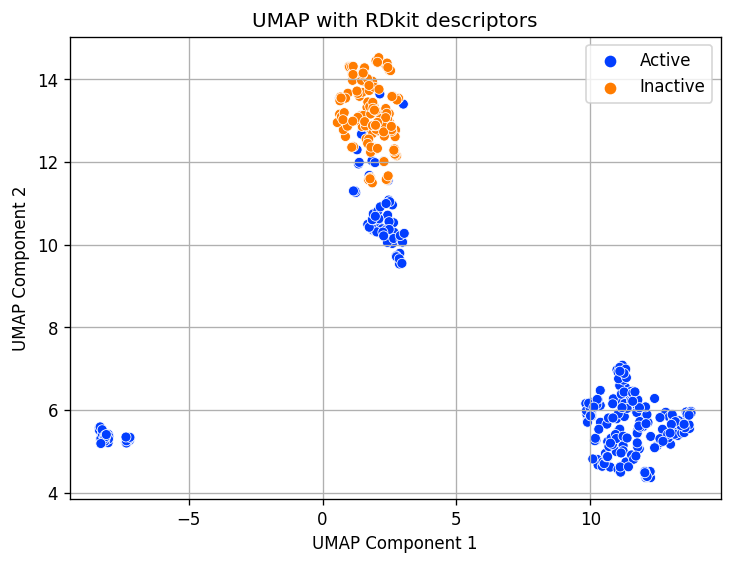

In [254]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_desc, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP with RDkit descriptors', fontsize=12)
plt.show()

PCA

In [255]:
from sklearn.decomposition import PCA

In [256]:
pca = PCA(n_components=2)
pca_rdkit = pca.fit_transform(rdkit_gpr6_standardized)
pca_rdkit_df = pd.DataFrame(pca_rdkit, columns= ['PCA1', 'PCA2'])
pca_rdkit_df

,PCA1,PCA2
0,3.440757,-3.296086
1,0.857869,-6.760220
2,2.703432,-5.727619
3,-0.551936,-7.628968
4,-4.400662,2.638259
...,...,...
401,1.475558,-5.790551
402,0.984020,-5.821534
403,3.024787,-3.747744
404,-0.488446,-7.696429


In [257]:
#feature_to_model = np.array(pca_rdkit_df)
#label_to_model = df_rdkit_desc_standard.activity_label.tolist()


(static_train_x, 
 static_test_x, 
 static_train_y,
 static_test_y) = train_test_split(df_rdkit_desc_standard.drop(['activity_label'], axis='columns'), df_rdkit_desc_standard.activity_label, 
                                   test_size=0.2) #Use all features

splits = [static_train_x, static_test_x, static_train_y, static_test_y]

print("Training data size:", len(static_train_x))
print("Test data size:", len(static_test_x))

Training data size: 324
Test data size: 82


In [258]:
param = {
    "n_estimators": 40,  # number of trees to grows
    "criterion": "entropy",  # cost function to be optimized for a split
}
model_RF = RandomForestClassifier(**param)

Accuracy: 0.98780
Sensitivity: 0.98182
Specificity: 1.00000
AUC: 0.99697
Confusion Matrix: [[27  0]
 [ 1 54]]


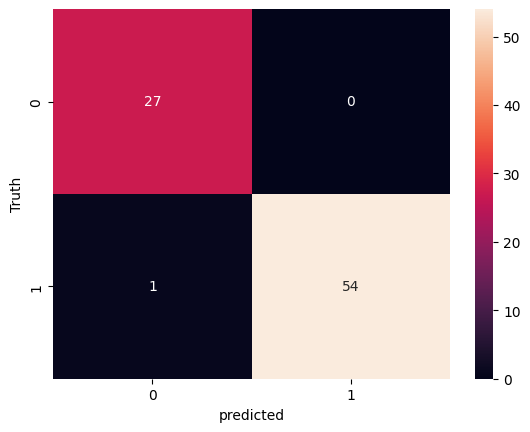

In [259]:
performance_measures = model_training_and_validation(model_RF, "RF", splits)

In [260]:
feature_rdkit_gpr6 = pd.Series(model_RF.feature_importances_, index=rdkit_gpr6.columns).sort_values(ascending=False)
feature_rdkit_gpr6.head(10)

FractionCSP3    0.112643
SlogP_VSA8      0.070927
SlogP_VSA6      0.067782
SMR_VSA10       0.055900
SlogP_VSA3      0.047993
Chi4n           0.038372
SMR_VSA5        0.036311
PEOE_VSA8       0.035275
qed             0.030777
VSA_EState6     0.029700
dtype: float64

Feature impotance from coefficients

In [261]:
from sklearn.linear_model import RidgeCV

In [262]:
dataset = df_rdkit_desc_standard.values

X = dataset[:, 1:]
y = dataset[:, 0]

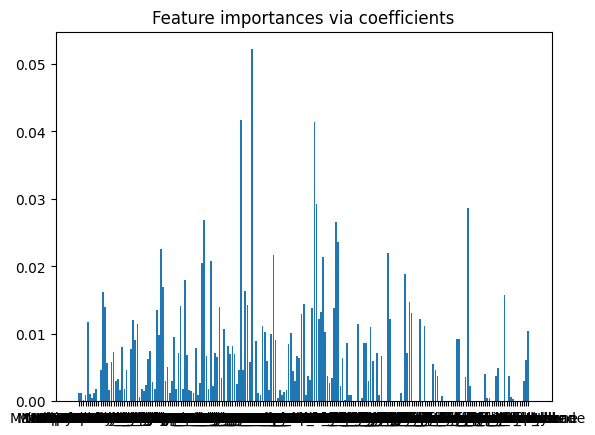

In [263]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=10)).fit(x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(rdkit_gpr6_standardized.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [264]:
from time import time

from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-10] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['SlogP_VSA3' 'SlogP_VSA8' 'NumAliphaticHeterocycles']
Done in 0.067s


In [265]:
#from sklearn.feature_selection import SequentialFeatureSelector
#
#tic_fwd = time()
#sfs_forward = SequentialFeatureSelector(
#    ridge, n_features_to_select=10, direction="forward"
#).fit(X, y)
#toc_fwd = time()
#
#tic_bwd = time()
#sfs_backward = SequentialFeatureSelector(
#    ridge, n_features_to_select=10, direction="backward"
#).fit(X, y)
#toc_bwd = time()
#
#print(
#    "Features selected by forward sequential selection: "
#    f"{feature_names[sfs_forward.get_support()]}"
#)
#print(f"Done in {toc_fwd - tic_fwd:.3f}s")
#print(
#    "Features selected by backward sequential selection: "
#    f"{feature_names[sfs_backward.get_support()]}"
#)
#print(f"Done in {toc_bwd - tic_bwd:.3f}s")